# Módulo de estatística 

## Projeto - Análise do dataset "Wine Quality"

### Instruções

- O projeto deverá ser entregue até dia 26/01 antes do início da aula
- O projeto poderá ser feito em grupo com até 4 integrantes

- A entrega deve ser feita em jupyter notebook com os códigos explícitos e comentados. Além disso os conceitos, decisões e conclusões usadas devem estar destacadas no notebook.

### Informações sobre o projeto

Dataset (conjunto de dados a ser utilizado) está disponível em:
    https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests): <br>
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data): <br>
- 12 - quality (score between 0 and 10)

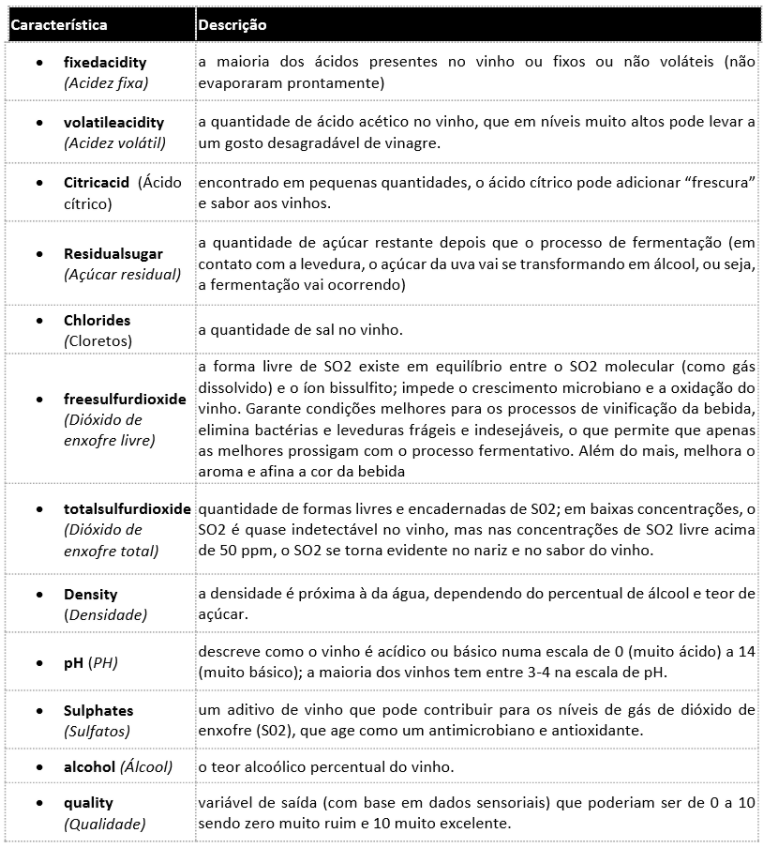

### Etapa 1

**EDA - Análise exploratória de dados**

- Análise das medidas de medidas de posição, dispersão, correlação (análises univaridas e bivariadas) - histograma, boxplot, mapa de calor, etc...
- Exclusão de outliers, caso necessário (sempre explicando a opção)



### Etapa 2

**Regressão Linear**

- Faça um algoritmo que estime a variável “Quality” em função das características físico-químicas dos vinhos
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

### Etapa 3

**Regressão logística**

- Sabendo que os vinhos com notas >= 6 são considerados vinhos de boa qualidade faça um algoritmo que classifique os vinhos em “Bom” ou “Ruim” em função de suas características físico-químicas;
- Colocar comentários sobre a técnica utilizada e análise sobre as variáveis utilizadas, além dos seus respectivos “achados”. Faça uma interpretação do resultado

### GRUPO 3

#### Emília Lima, Gabriela Zorzi, Jullie Belmonte, Sarah Mazzini

Nesse projeto, faremos uma análise exploratória de dados do dataset Wine Quality Red, utilizaremos o modelo de regressão linear para estimar a variável "Quality" em função das características físico-químicas e o modelo de regressão logística para classificar os vinhos em “Bom” ou “Ruim” em função de suas características físico-químicas." 

#### Importando as bibliotecas:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

### Etapa 1

#### EDA - Análise exploratória de dados

In [2]:
# Lendo o dataset
df = pd.read_csv('winequality-red.csv', sep=";")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Dimensões do dataset (linhas, colunas)
df.shape

(1599, 12)

In [5]:
# Checando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Em todas as nossas colunas os dados são do tipo *float*, exceto na coluna *quality* em que os dados são do tipo *int*.

In [6]:
# Verificando se existem dados nulos
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# Verificando dados duplicados
df.duplicated().sum()

240

Encontramos 240 linhas duplicadas, então vamos excluí-las.

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
# Obtendo as principais estatísticas dos dados
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


Através do describe, observamos que as variáveis *density* e *chlorides* são as que apresentam menor desvio padrão, ou seja, os dados não são dispersos em relação à média e são mais homogêneos. Já as variáveis *free sulfur dioxide* e *total sulfur dioxide* apresentam um desvio padrão grande o que indica maior dispersão dos dados em relação à média.

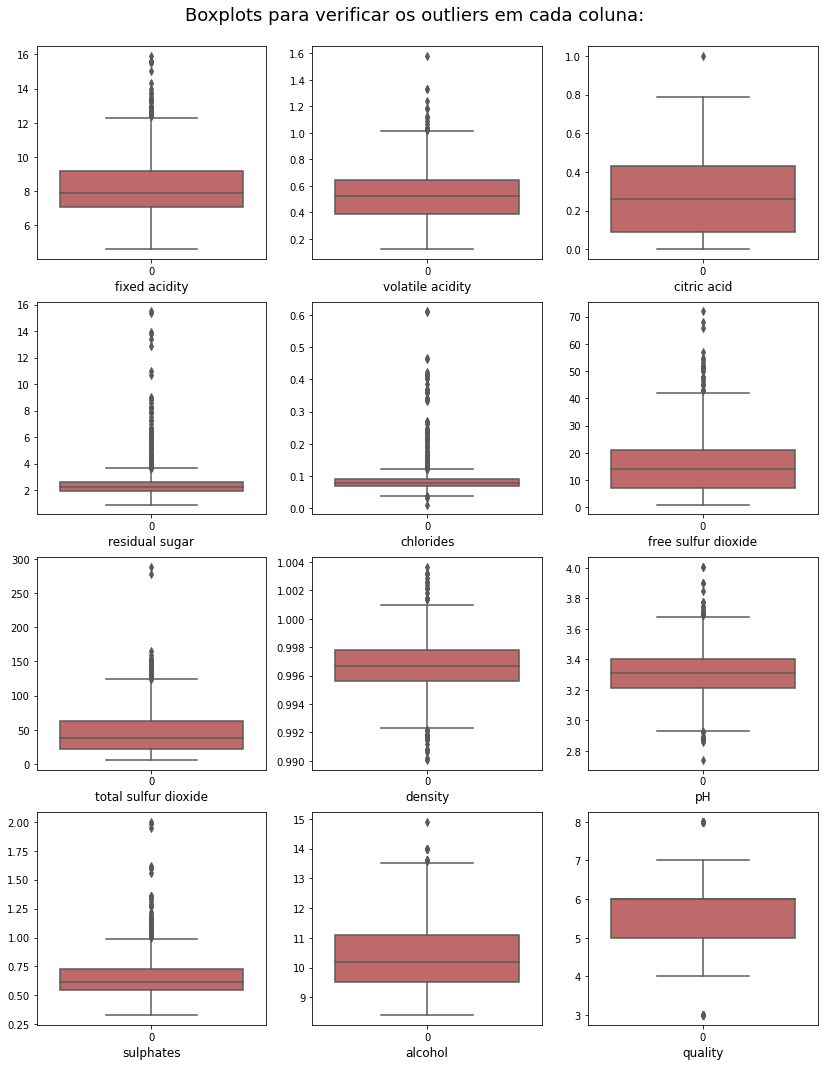

In [10]:
# Lista com todas as colunas do dataset
colunas = ['fixed acidity', 'volatile acidity', 'citric acid',  'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Criando subplots para os gráficos boxplot
fig, axs = plt.subplots(4, 3, figsize=(14,18))
fig.suptitle("Boxplots para verificar os outliers em cada coluna:", fontsize=18, va= "baseline", y=0.9); # Título

# Boxplot para verificar dados outliers em cada coluna
for i, coluna in enumerate(colunas):
    sns.boxplot(data=df[coluna], ax=axs[i // 3, i % 3], color="indianred")
    axs[i // 3, i % 3].set_xlabel(coluna, fontsize = 12) # Configurando nome das colunas no eixo x

Podemos observar a presença de outliers em todas as variáveis do dataset.
Na próxima etapa, verificaremos como os outliers influenciam na estimativa da variável *quality* utilizando a regressão linear.

A seguir, vamos análisar a influência de cada uma das características fisico-químicas dos vinhos na qualidade, para isso utilizaremos também boxplots.

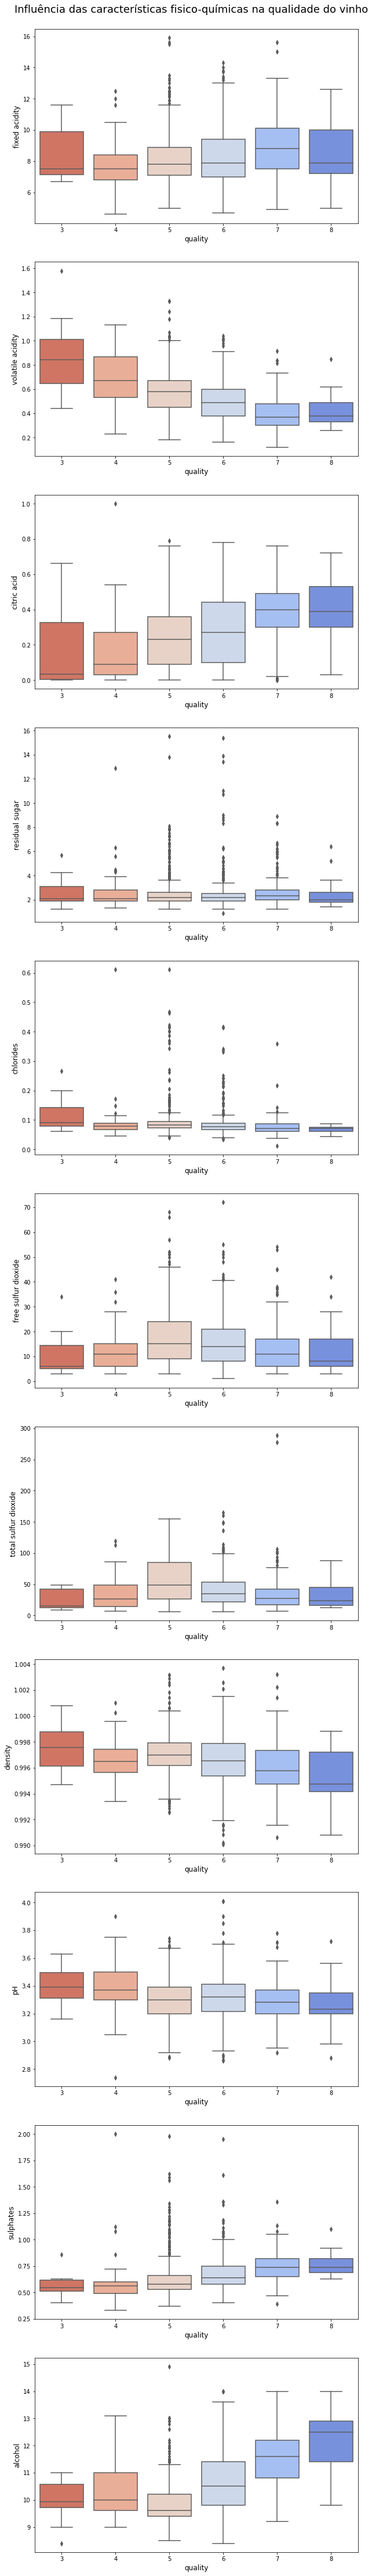

In [11]:
# Criando subplots para os gráficos boxplot
fig, axs = plt.subplots(11, 1, figsize=(10,80))
fig.suptitle("Influência das características fisico-químicas na qualidade do vinho", fontsize=18, va= "baseline", y=0.885);

# Boxplot para verificar a influência de cada coluna na variável "quality"
for i, coluna in enumerate(colunas[:-1]):
    sns.boxplot(x='quality', y=coluna, data=df, ax=axs[i % 11], palette='coolwarm_r')
    axs[i % 11].set_xlabel('quality', fontsize = 12)
    axs[i % 11].set_ylabel(coluna, fontsize = 12)

Observamos que os componentes do vinho que mais influenciam na qualidade são:
- *volatile acidity*
- *citric acid*
- *sulphates*
- *alcohol*

No mapa de calor (heatmap) iremos detalhar a correlação entre essas variáveis e a variável *quality*.

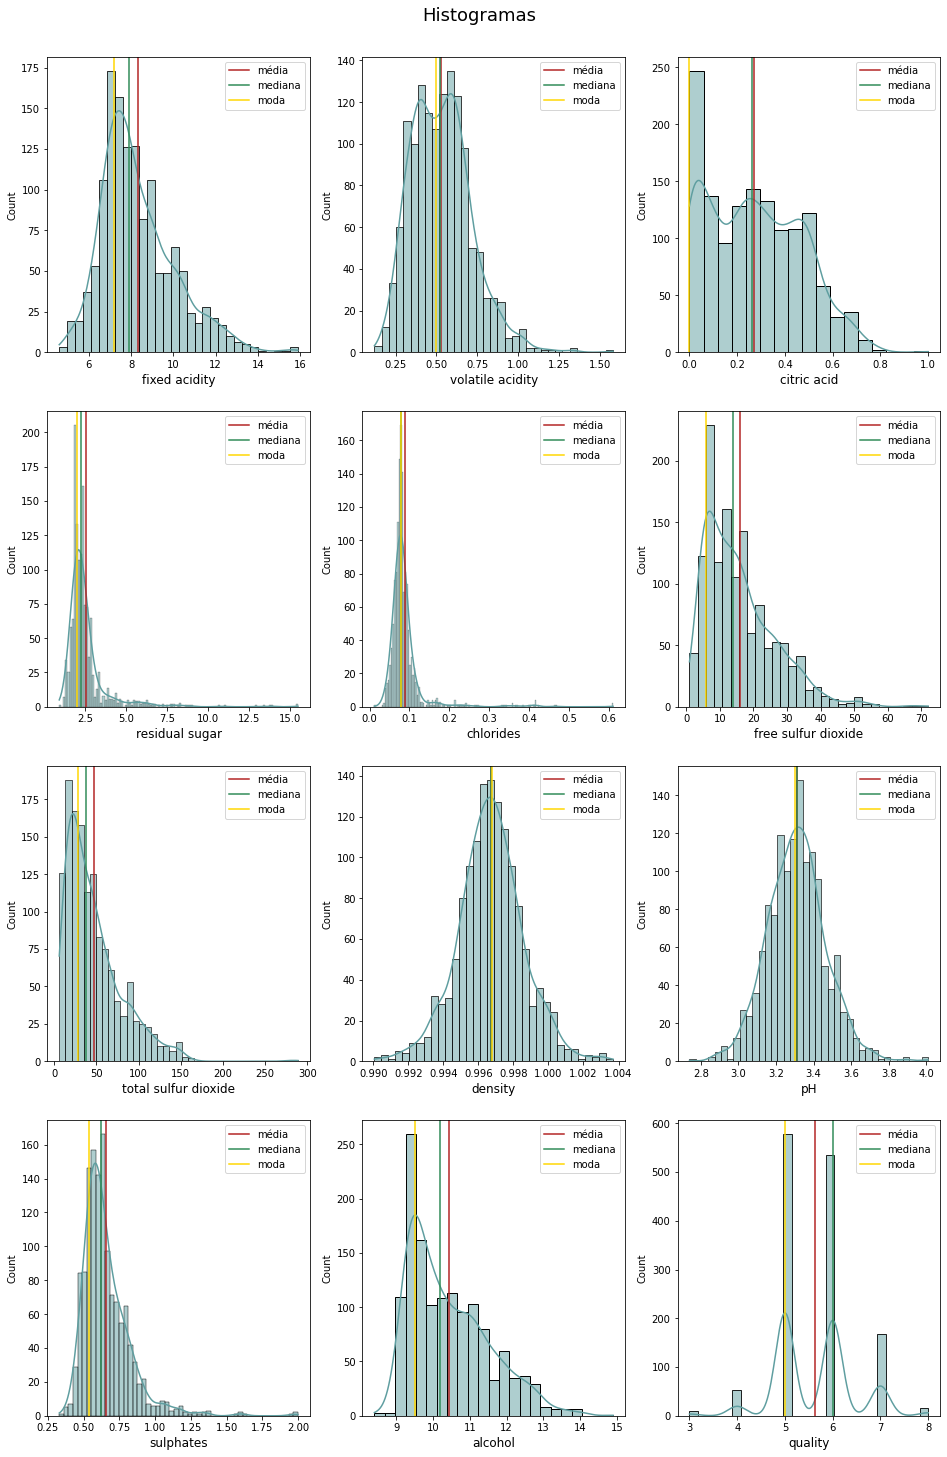

In [12]:
fig, axs = plt.subplots(4, 3, figsize=(16,25))
fig.suptitle("Histogramas", fontsize=18, va= "baseline", y=0.9);

for i, coluna in enumerate(colunas):
    sns.histplot(data=df, x=coluna, kde=True, ax=axs[i // 3, i % 3], color="cadetblue")
    axs[i // 3, i % 3].set_xlabel(coluna, fontsize = 12)
    axs[i // 3, i % 3].axvline(x=df[coluna].mean(), color="firebrick", label="média")
    axs[i // 3, i % 3].axvline(df[coluna].median(), color="seagreen", label="mediana")
    for n in range(df[coluna].mode().shape[0]):
        axs[i // 3, i % 3].axvline(df[coluna].mode()[n], color="gold", label="moda")
    axs[i // 3, i % 3].legend()

Analisamos nos histogramas acima que as variáveis *density* e *pH* apresentam uma distribuição normal.

In [13]:
# Correlação do dataset
corr = df.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


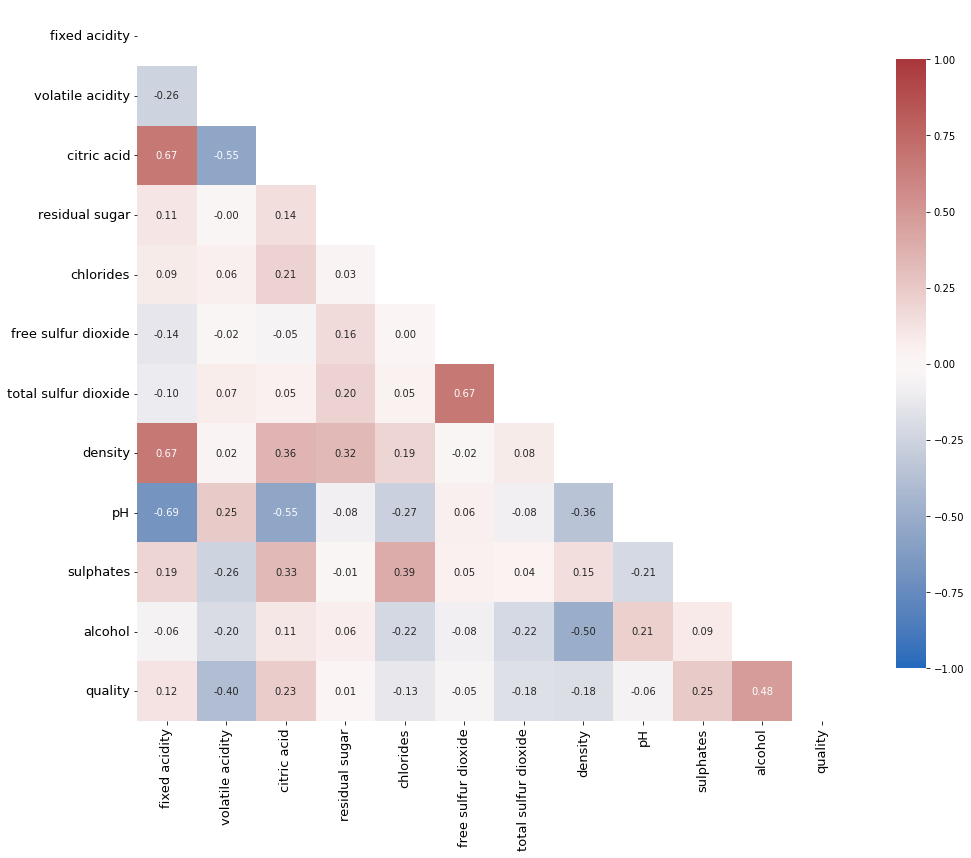

In [14]:
# Criando heatmap com correlação
plt.figure(figsize=(16, 16)) #tamanho do gráfico

matrix = np.triu(corr) #mask para plotar apenas metade do heatmap

heatmap = sns.heatmap(corr, cmap=sns.color_palette("vlag", as_cmap=True), cbar_kws={"shrink": .7}, vmin=-1, vmax=1, center=0, square=True, annot=True, fmt=".2f", mask=matrix);

# Aumentando tamanho dos eixos x e y
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

Uma correlação forte positiva (0.67) pode ser observada entre:
- *fixed acidity* e *citric acid*
- *fixed acidity* e *density*
- *free sulfur dioxide* e *total sulfur dioxide*

E uma correlação forte negativa (-0.69) entre *fixed acidity* e *pH*

Em relação a *quality*, *alcohol* é a característica em que a correlação é mais forte positivamente, seguido de *sulphates* e *citric acid*. A correlação com a *volatile acidity* é mais forte negativamente, ou seja, quanto maior a *volatile acidity* menor a qualidade do vinho, como também observamos nos boxplots de influência apresentados anteriormente.

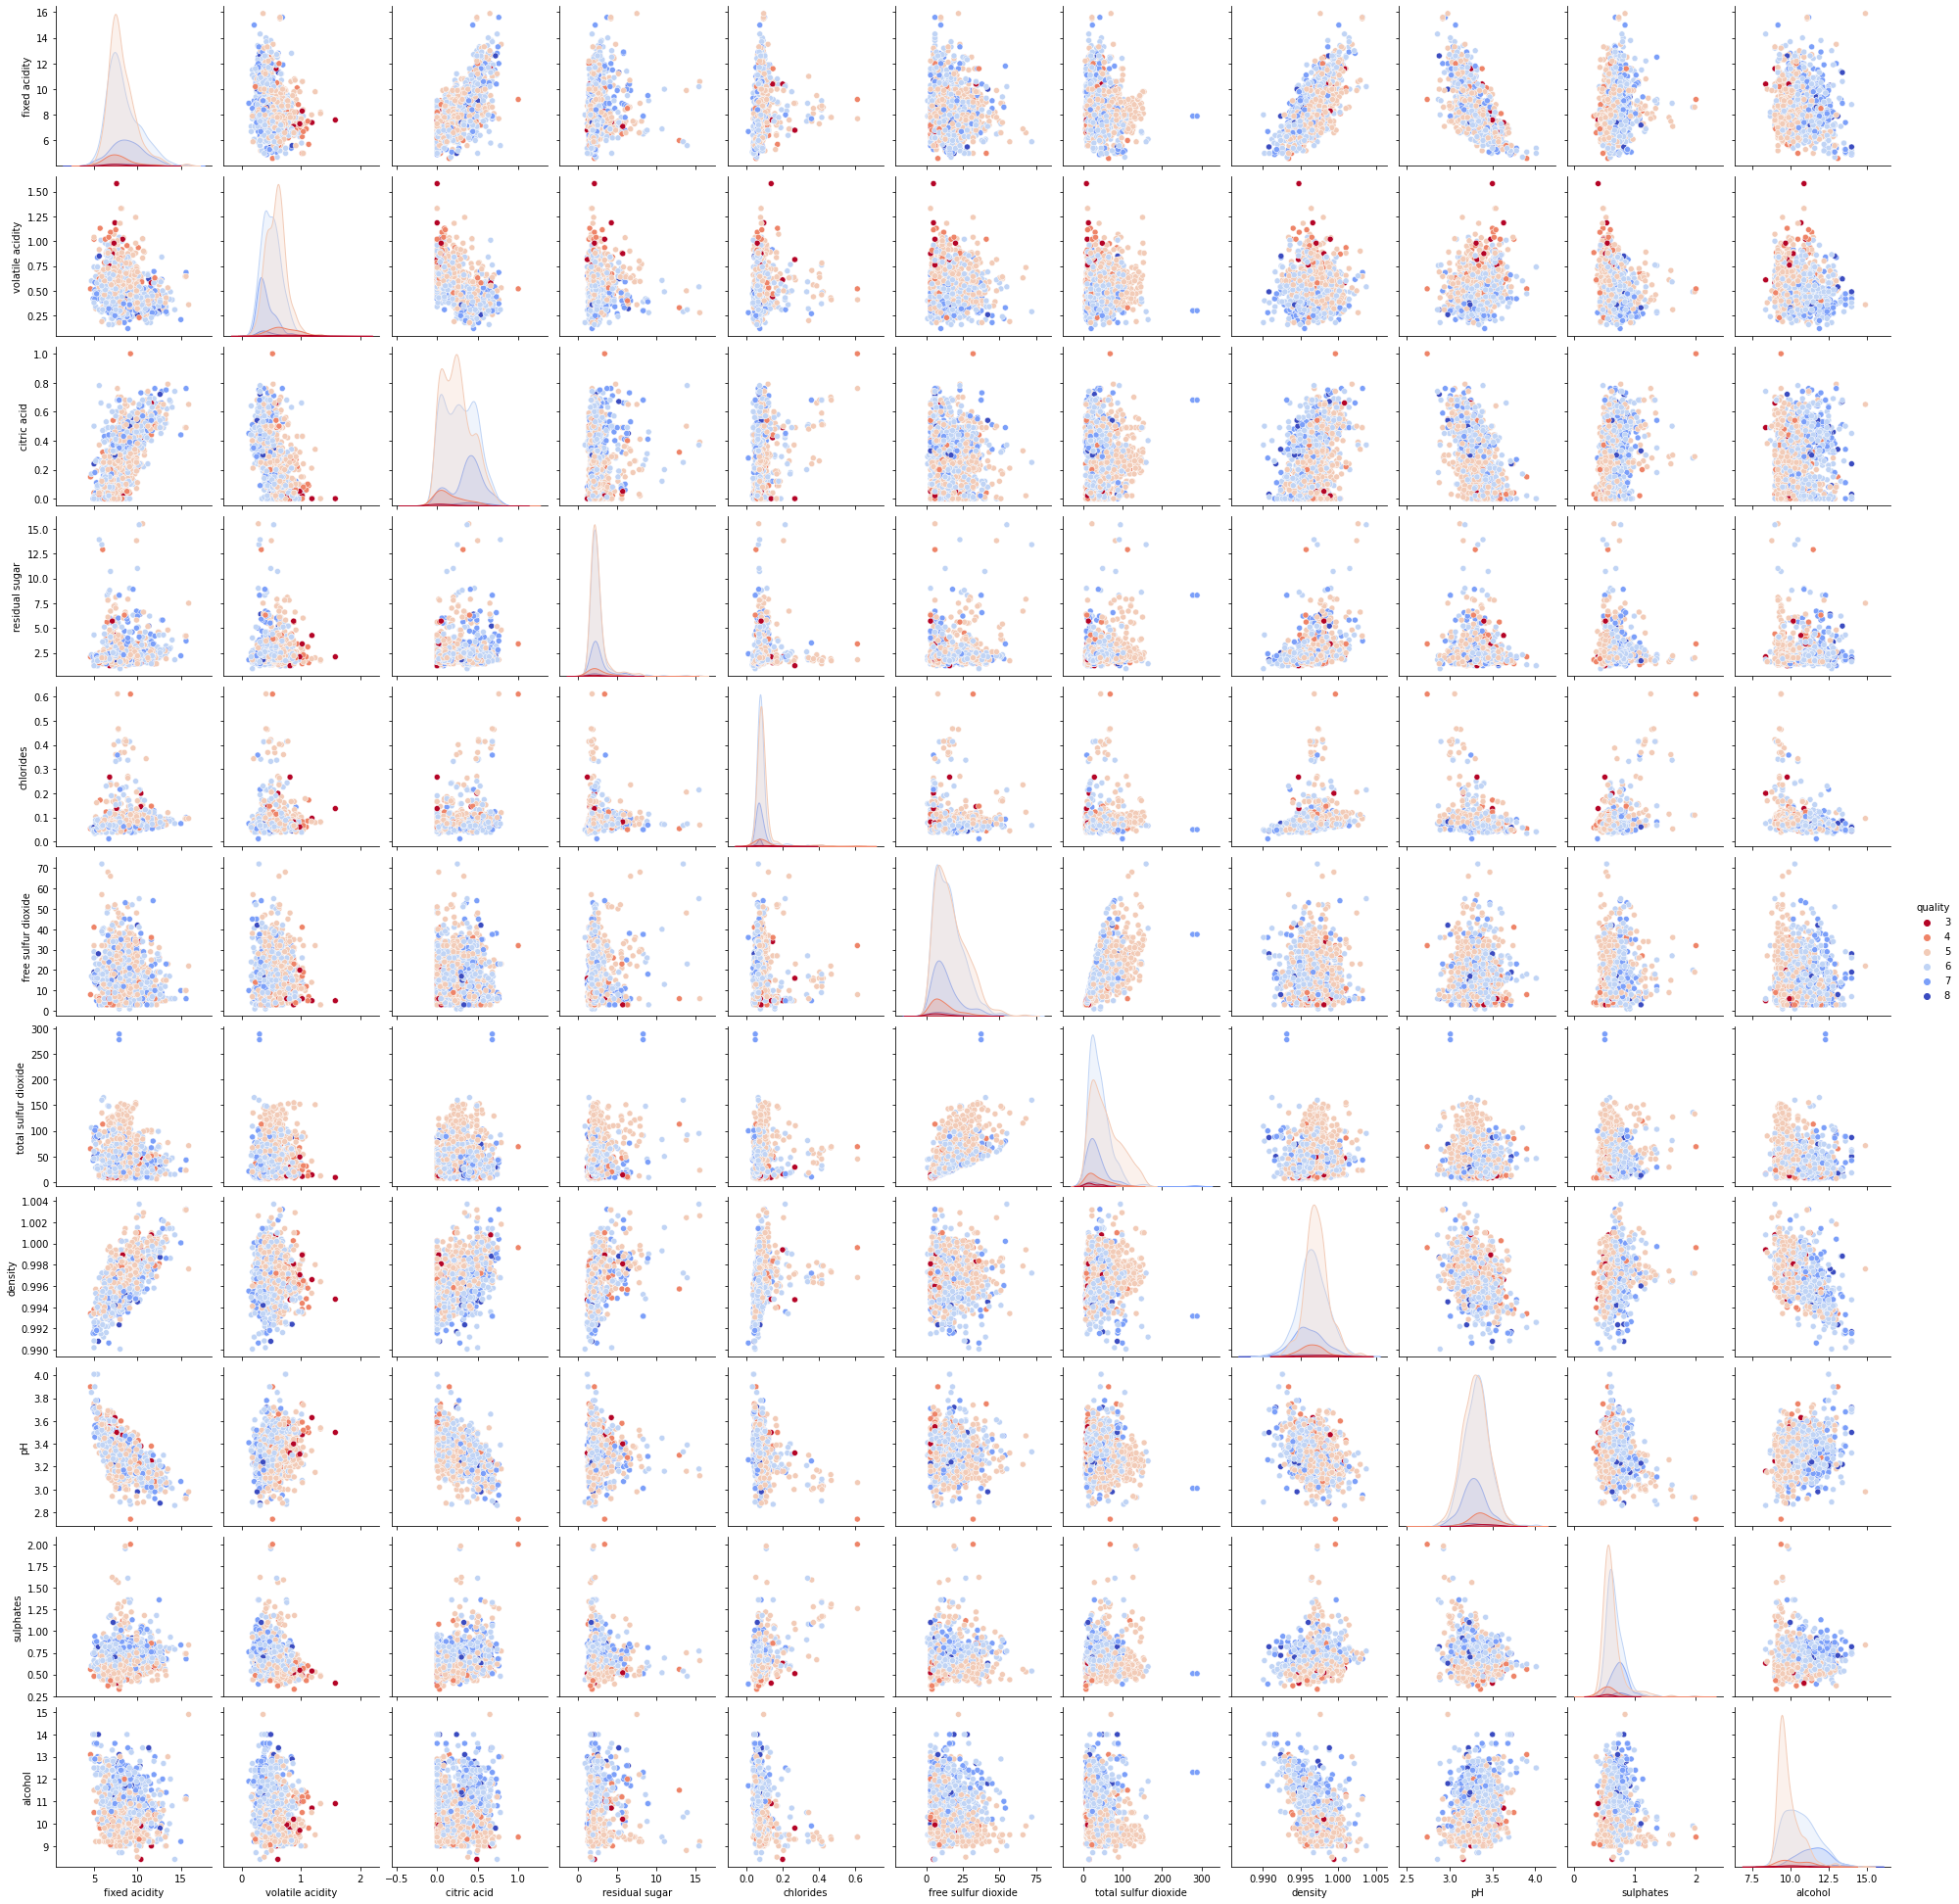

In [15]:
sns.pairplot(df, hue='quality', palette='coolwarm_r')
plt.show()

No gráfico acima, utilizamos a variável *quality* como parâmetro hue, para observar a dispersão dos dados em relação a qualidade dos vinhos. Podemos verificar uma linearidade entre as variáveis: *fixed acidity* e *citric acid*, *fixed acidity* e *density*, *free sulfur dioxide* e *total sulfur dioxide* (já haviamos verificado a correlação entre essas variáveis no heatmap acima).

Conseguimos também oberservar que na variável *volatile acidity* há uma melhor separação dos dados em relação a qualidade do vinho.

**Fazendo uma análise mais detalhada dos outliers em cada variável do dataset:**

In [16]:
# Analisando os outliers da variável 'fixed acidity'
q1 = np.quantile(df['fixed acidity'], 0.25)
q3 = np.quantile(df['fixed acidity'], 0.75)
iqr = q3 - q1

maximo= q3 + 1.5 * iqr
minimo = q1 - 1.5 * iqr

df[(df['fixed acidity'] > maximo) | (df['fixed acidity'] < minimo)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
205,12.8,0.300,0.74,2.6,0.095,9.0,28.0,0.99940,3.20,0.77,10.8,7
243,15.0,0.210,0.44,2.2,0.075,10.0,24.0,1.00005,3.07,0.84,9.2,7
264,12.5,0.560,0.49,2.4,0.064,5.0,27.0,0.99990,3.08,0.87,10.9,5
294,13.3,0.340,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.5,6
328,13.4,0.270,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7,6
338,12.4,0.490,0.58,3.0,0.103,28.0,99.0,1.00080,3.16,1.00,11.5,6
339,12.5,0.280,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.8,7
347,13.8,0.490,0.67,3.0,0.093,6.0,15.0,0.99860,3.02,0.93,12.0,6
353,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.0,5
359,12.6,0.380,0.66,2.6,0.088,10.0,41.0,1.00100,3.17,0.68,9.8,6


In [17]:
# Analisando os outliers da variável 'volatile acidity'
q1 = np.quantile(df['volatile acidity'], 0.25)
q3 = np.quantile(df['volatile acidity'], 0.75)
iqr = q3 - q1
maximo = q3 + 1.5 * iqr
minimo = q1 - 1.5 * iqr

df[(df['volatile acidity'] > maximo) | (df['volatile acidity'] < minimo)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4
120,7.3,1.070,0.09,1.70,0.178,10.0,89.0,0.99620,3.30,0.57,9.0,5
126,8.2,1.330,0.00,1.70,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5
127,8.1,1.330,0.00,1.80,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5
134,7.9,1.040,0.05,2.20,0.084,13.0,29.0,0.99590,3.22,0.55,9.9,6
199,6.9,1.090,0.06,2.10,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,4
553,5.0,1.040,0.24,1.60,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5
672,9.8,1.240,0.34,2.00,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3


In [18]:
# Analisando os outliers da variável 'citric acid'
q1 = np.quantile(df['citric acid'], 0.25)
q3 = np.quantile(df['citric acid'], 0.75)
iqr = q3 - q1
maximo = q3 + 1.5 * iqr
minimo = q1 - 1.5 * iqr

df[(df['citric acid'] > maximo) | (df['citric acid'] < minimo)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
151,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4


In [19]:
# Analisando os outliers da variável 'residual sugar'
q1 = np.quantile(df['residual sugar'], 0.25) 
q3 = np.quantile(df['residual sugar'], 0.75)
iqr = q3 - q1
maximo = q3 + 1.5 * iqr
minimo = q1 - 1.5 * iqr

df[(df['residual sugar'] > maximo) | (df['residual sugar'] < minimo)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
18,7.4,0.590,0.08,4.4,0.086,6.0,29.0,0.99740,3.38,0.50,9.0,4
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1552,6.3,0.680,0.01,3.7,0.103,32.0,54.0,0.99586,3.51,0.66,11.3,6
1558,6.9,0.630,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,5
1574,5.6,0.310,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,6
1577,6.2,0.700,0.15,5.1,0.076,13.0,27.0,0.99622,3.54,0.60,11.9,6


In [20]:
# Analisando os outliers da variável 'chlorides'
q1 = np.quantile(df['chlorides'], 0.25)
q3 = np.quantile(df['chlorides'], 0.75)
iqr = q3 - q1
maximo = q3 + 1.5 * iqr
minimo = q1 - 1.5 * iqr

df[(df['chlorides'] > maximo) | (df['chlorides'] < minimo)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.62,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.62,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
17,8.1,0.56,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
38,5.7,1.13,0.09,1.5,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1436,10.0,0.38,0.38,1.6,0.169,27.0,90.0,0.99914,3.15,0.65,8.5,5
1474,9.9,0.50,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
1558,6.9,0.63,0.33,6.7,0.235,66.0,115.0,0.99787,3.22,0.56,9.5,5
1570,6.4,0.36,0.53,2.2,0.230,19.0,35.0,0.99340,3.37,0.93,12.4,6


In [21]:
# Analisando os outliers da variável 'free sulfur dioxide'
q1 = np.quantile(df['free sulfur dioxide'], 0.25)
q3 = np.quantile(df['free sulfur dioxide'], 0.75)
iqr = q3 - q1
maximo = q3 + 1.5 * iqr
minimo = q1 - 1.5 * iqr

df[(df['free sulfur dioxide'] > maximo) | (df['free sulfur dioxide'] < minimo)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.80,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.90,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
57,7.5,0.630,0.12,5.10,0.111,50.0,110.0,0.99830,3.26,0.77,9.4,5
396,6.6,0.735,0.02,7.90,0.122,68.0,124.0,0.99940,3.47,0.53,9.9,5
497,7.2,0.340,0.32,2.50,0.090,43.0,113.0,0.99660,3.32,0.79,11.1,5
522,8.2,0.390,0.49,2.30,0.099,47.0,133.0,0.99790,3.38,0.99,9.8,5
584,11.8,0.330,0.49,3.40,0.093,54.0,80.0,1.00020,3.30,0.76,10.7,7
634,7.9,0.350,0.21,1.90,0.073,46.0,102.0,0.99640,3.27,0.58,9.5,5
678,8.3,0.780,0.10,2.60,0.081,45.0,87.0,0.99830,3.48,0.53,10.0,5
925,8.6,0.220,0.36,1.90,0.064,53.0,77.0,0.99604,3.47,0.87,11.0,7


In [22]:
# Analisando os outliers da variável 'total sulfur dioxide'
q1 = np.quantile(df['total sulfur dioxide'], 0.25)
q3 = np.quantile(df['total sulfur dioxide'], 0.75)
iqr = q3 - q1
maximo = q3 + 1.5 * iqr
minimo = q1 - 1.5 * iqr

df[(df['total sulfur dioxide'] > maximo) | (df['total sulfur dioxide']< minimo)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.9,0.620,0.18,3.8,0.176,52.0,145.0,0.99860,3.16,0.88,9.2,5
15,8.9,0.620,0.19,3.9,0.170,51.0,148.0,0.99860,3.17,0.93,9.2,5
86,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
88,9.3,0.390,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,5
90,7.9,0.520,0.26,1.9,0.079,42.0,140.0,0.99640,3.23,0.54,9.5,5
92,8.6,0.490,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.8,5
109,8.1,0.785,0.52,2.0,0.122,37.0,153.0,0.99690,3.21,0.69,9.3,5
130,8.0,0.745,0.56,2.0,0.118,30.0,134.0,0.99680,3.24,0.66,9.4,5
145,8.1,0.670,0.55,1.8,0.117,32.0,141.0,0.99680,3.17,0.62,9.4,5
154,7.1,0.430,0.42,5.5,0.070,29.0,129.0,0.99730,3.42,0.72,10.5,5


In [23]:
# Analisando os outliers da variável 'density'
q1 = np.quantile(df['density'], 0.25)
q3 = np.quantile(df['density'], 0.75)
iqr = q3 - q1
maximo = q3 + 1.5 * iqr
minimo = q1 - 1.5 * iqr

df[(df['density'] > maximo) | (df['density'] < minimo)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
142,5.2,0.340,0.00,1.80,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
294,13.3,0.340,0.52,3.20,0.094,17.0,53.0,1.00140,3.05,0.81,9.500000,6
324,10.0,0.490,0.20,11.00,0.071,13.0,50.0,1.00150,3.16,0.69,9.200000,6
353,13.5,0.530,0.79,4.80,0.120,23.0,77.0,1.00180,3.18,0.77,13.000000,5
354,6.1,0.210,0.40,1.40,0.066,40.5,165.0,0.99120,3.25,0.59,11.900000,6
364,12.8,0.615,0.66,5.80,0.083,7.0,42.0,1.00220,3.07,0.73,10.000000,7
374,14.0,0.410,0.63,3.80,0.089,6.0,47.0,1.00140,3.01,0.81,10.800000,6
381,13.7,0.415,0.68,2.90,0.085,17.0,43.0,1.00140,3.06,0.80,10.000000,6
415,8.6,0.725,0.24,6.60,0.117,31.0,134.0,1.00140,3.32,1.07,9.300000,5
442,15.6,0.685,0.76,3.70,0.100,6.0,43.0,1.00320,2.95,0.68,11.200000,7


In [24]:
# Analisando os outliers da variável 'pH'
q1 = np.quantile(df['pH'], 0.25)
q3 = np.quantile(df['pH'], 0.75)
iqr = q3 - q1
maximo = q3 + 1.5 * iqr
minimo = q1 - 1.5 * iqr

df[(df['pH'] > maximo) | (df['pH'] < minimo)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,4.6,0.520,0.15,2.10,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4
95,4.7,0.600,0.17,2.30,0.058,17.0,106.0,0.99320,3.85,0.60,12.9,6
151,9.2,0.520,1.00,3.40,0.610,32.0,69.0,0.99960,2.74,2.00,9.4,4
268,6.9,0.540,0.04,3.00,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,6
440,12.6,0.310,0.72,2.20,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
544,14.3,0.310,0.74,1.80,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,6
553,5.0,1.040,0.24,1.60,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5
554,15.5,0.645,0.49,4.20,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5
557,15.6,0.645,0.49,4.20,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5


In [25]:
# Analisando os outliers da variável 'sulphates'
q1 = np.quantile(df['sulphates'], 0.25)
q3 = np.quantile(df['sulphates'], 0.75)
iqr = q3 - q1
maximo = q3 + 1.5 * iqr
minimo = q1 - 1.5 * iqr

df[(df['sulphates'] > maximo) | (df['sulphates'] < minimo)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5
17,8.1,0.560,0.28,1.7,0.368,16.0,56.0,0.99680,3.11,1.28,9.3,5
19,7.9,0.320,0.51,1.8,0.341,17.0,56.0,0.99690,3.04,1.08,9.2,6
43,8.1,0.660,0.22,2.2,0.069,9.0,23.0,0.99680,3.30,1.20,10.3,5
79,8.3,0.625,0.20,1.5,0.080,27.0,119.0,0.99720,3.16,1.12,9.1,4
81,7.8,0.430,0.70,1.9,0.464,22.0,67.0,0.99740,3.13,1.28,9.4,5
83,7.3,0.670,0.26,1.8,0.401,16.0,51.0,0.99690,3.16,1.14,9.4,5
86,8.6,0.490,0.28,1.9,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
88,9.3,0.390,0.44,2.1,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,5
92,8.6,0.490,0.29,2.0,0.110,19.0,133.0,0.99720,2.93,1.98,9.8,5


In [26]:
# Analisando os outliers da variável 'alcohol'
q1 = np.quantile(df['alcohol'], 0.25)
q3 = np.quantile(df['alcohol'], 0.75)
iqr = q3 - q1
maximo = q3 + 1.5 * iqr
minimo = q1 - 1.5 * iqr

df[(df['alcohol'] > maximo) | (df['alcohol'] < minimo)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.000000,6
467,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.000000,6
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.000000,8
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.900000,5
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.000000,7
1114,5.0,0.40,0.50,4.3,0.046,29.0,80.0,0.99020,3.49,0.66,13.600000,6
1132,7.4,0.36,0.34,1.8,0.075,18.0,38.0,0.99330,3.38,0.88,13.600000,7
1228,5.1,0.42,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,7
1269,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,8
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.000000,6


In [27]:
# Analisando os outliers da variável 'quality'
q1 = np.quantile(df['quality'], 0.25)
q3 = np.quantile(df['quality'], 0.75)
iqr = q3 - q1
maximo = q3 + 1.5 * iqr
minimo = q1 - 1.5 * iqr

df[(df['quality'] > maximo) | (df['quality'] < minimo)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.350,0.46,3.60,0.078,15.0,37.0,0.99730,3.35,0.86,12.80,8
278,10.3,0.320,0.45,6.40,0.073,5.0,13.0,0.99760,3.23,0.82,12.60,8
390,5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.90,8
440,12.6,0.310,0.72,2.20,0.072,6.0,29.0,0.99870,2.88,0.82,9.80,8
455,11.3,0.620,0.67,5.20,0.086,6.0,19.0,0.99880,3.22,0.69,13.40,8
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
481,9.4,0.300,0.56,2.80,0.080,6.0,17.0,0.99640,3.15,0.92,11.70,8
495,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.00,8
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
588,5.0,0.420,0.24,2.00,0.060,19.0,50.0,0.99170,3.72,0.74,14.00,8


### Etapa 2

#### Regressão Linear

Algoritmo que estima a variável *quality* em função das características físico-químicas dos vinhos **sem a retirada dos outliers**:

In [28]:
# Definindo a regressão linear múltipla
# Preparando X e y
y = df['quality'] # variável resposta
X = df.drop(['quality'], axis=1) # variável explicativa

In [29]:
# Instanciando a classe LinearRegression
lr = LinearRegression()

# Treinando o modelo
lr.fit(X, y)

LinearRegression()

In [30]:
lr.intercept_ # intercepto (Beta_0)

13.237941044743732

In [31]:
lr.coef_ # coeficientes Beta_i da regressão linear múltipla  

array([ 1.25660852e-02, -1.12043699e+00, -1.64242301e-01,  7.10798353e-03,
       -1.93025669e+00,  3.34295187e-03, -2.70726666e-03, -8.99042958e+00,
       -4.58486885e-01,  9.14702306e-01,  2.89530709e-01])

In [32]:
y_pred = lr.predict(X) # Valor estimado de Y (quality)
y_pred

array([5.0120376 , 5.11205476, 5.19440324, ..., 5.94517011, 5.44314221,
       6.01592572])

In [33]:
r2_score(y, y_pred)  # coeficiente de determinação

0.36379974128919534

In [34]:
lr.score(X, y)

0.36379974128919534

In [35]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     70.02
Date:                Wed, 26 Jan 2022   Prob (F-statistic):          5.83e-124
Time:                        11:42:37   Log-Likelihood:                -1356.8
No. Observations:                1359   AIC:                             2738.
Df Residuals:                    1347   BIC:                             2800.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   13.2379     23.522      0.563      0.574     -32.906      59.381
fixed acidity            0.0126      0.029      0.434      0.664      -0.044       0.069
volatile acidity        -1.1204      0.130     -8.593      0.000      -1.376      -0.865
citric acid             -0.1642      0.162     -1.015      0.310      -0.482       0.153
residual sugar           0.0071      0.017      0.419      0.675      -0.026       0.040
chlorides               -1.9303      0.448     -4.304      0.000      -2.810      -1.050
free sulfur dioxide      0.0033      0.002      1.397      0.163      -0.001       0.008
total sulfur dioxide    -0.0027      0.001     -3.394      0.001      -0.004      -0.001
density                 -8.9904     24.002     -0.375      0.708     -56.075      38.094
pH                      -0.4585      0.213     -2.155      0.031      -0.876      -0.041
sulphates                0.9147      0.127      7.202      0.000       0.666       1.164
alcohol                  0.2895      0.029      9.876      0.000       0.232       0.347
==============================================================================
Omnibus:                       26.019   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.103
Skew:                          -0.203   Prob(JB):                     8.77e-09
Kurtosis:                       3.701   Cond. No.                     1.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
model.resid # cálculo do resíduo

0      -0.012038
1      -0.112055
2      -0.194403
3       0.317226
5      -0.048517
          ...   
1593    0.537926
1594   -0.503038
1595    0.054830
1597   -0.443142
1598   -0.015926
Length: 1359, dtype: float64

In [37]:
model.resid.mean() # média do erro residual

4.059949171881929e-13

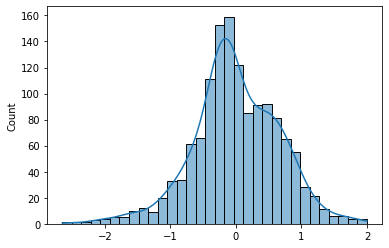

In [38]:
sns.histplot(model.resid, kde=True); # distribuição do erro

Sem retirar os outliers observa-se que apenas 36% dos dados podem ser explicados por esse modelo. Apesar disso, a média do erro é próxima de zero e os erros se distribuem normalmente.


Vamos refazer os cálculos retirando os outliers. Iniciaremos retirando os outliers das variáveis que apresentam maior desvio padrão, analisado no describe, que são *total sulfur dioxide*, *free sulfur dioxide*, *fixed acidity* e  *residual sugar.*

In [39]:
coluna_1 = ['total sulfur dioxide','free sulfur dioxide', 'fixed acidity', 'residual sugar']

# Função para cálculo do limite superior e inferior
def calc_min_and_max_range(dados_coluna):
    Q1 = dados_coluna.quantile(q=0.25) # Primeiro quartil
    Q3 = dados_coluna.quantile(q=0.75) # Terceiro quartil

    IQR = Q3 - Q1 # Intervalo interquartílico

    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR

    return inf, sup

# Ciclo for para retirar os outliers
for coluna in coluna_1:
    inf, sup = calc_min_and_max_range(df[coluna])
    
    df = df[(df[coluna] > inf) & (df[coluna] < sup)]

In [40]:
# Definindo a regressão linear múltipla
# Preparando X e y
y_1 = df['quality'] # variável resposta
X_1 = df.drop(['quality'], axis=1) # variável explicativa

In [41]:
# Instanciando a classe LinearRegression
lr = LinearRegression()

# Treinando o modelo
lr.fit(X_1, y_1)

LinearRegression()

In [42]:
lr.intercept_ # intercepto (Beta_0)

19.917860377810705

In [43]:
lr.coef_ # coeficientes Beta_i da regressão linear múltipla

array([ 1.09912190e-02, -1.11586618e+00, -3.30307575e-01,  5.24768925e-02,
       -2.24959499e+00,  8.82801663e-04, -2.12517854e-03, -1.56134665e+01,
       -5.54734297e-01,  1.18745257e+00,  2.95484640e-01])

In [44]:
y_pred1 = lr.predict(X_1) # Valor estimado de y_1 (quality)
y_pred1

array([5.00057546, 5.18185637, 5.24707148, ..., 5.95992522, 5.42820961,
       6.05792216])

In [45]:
r2_score(y_1, y_pred1)  # coeficiente de determinação

0.3825321275521536

In [46]:
lr.score(X_1, y_1)

0.3825321275521536

Após aplicar a regressão linear múltipla retirando os outliers das variáveis *total sulfur dioxide*, *free sulfur dioxide*, *fixed acidity* e *residual sugar*, observa-se que, apesar de possuírem maior desvio padrão, seus outliers não afetam significativamente na não-linearidade do modelo, já que o erro neste caso ficou muito próximo do anterior. Vamos agora retirar os outliers das demais variáveis e fazer a análise novamente.

In [47]:
coluna_2 = ['volatile acidity', 'citric acid', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']

for coluna in coluna_2:
    inf, sup = calc_min_and_max_range(df[coluna])
    
    df = df[(df[coluna] > inf) & (df[coluna] < sup)]

In [48]:
# Definindo a regressão linear múltipla
# Preparando X_2 e y_2
y_2 = df['quality'] # variável resposta
X_2 = df.drop(['quality'], axis=1) # variável explicativa

# Instanciando a classe LinearRegression
lr = LinearRegression()

# Treinando o modelo
lr.fit(X_2, y_2)

LinearRegression()

In [49]:
lr.intercept_ # intercepto (Beta_0)

31.013832278219542

In [50]:
lr.coef_ # coeficientes Beta_i da regressão linear múltipla

array([ 2.25495117e-02, -7.98201579e-01, -2.83500405e-01,  1.89507661e-02,
       -9.23586073e-01,  1.99988298e-03, -1.96115480e-03, -2.73957038e+01,
       -5.67002259e-01,  1.99692119e+00,  2.83241608e-01])

In [51]:
y_pred2 = lr.predict(X_2) # Valor estimado de y_2 (quality)
y_pred2

array([4.99822672, 5.37589072, 5.36628045, ..., 6.07402477, 5.55543146,
       5.96775238])

In [52]:
r2_score(y_2, y_pred2)  # coeficiente de determinação

0.3996521136791644

In [53]:
lr.score(X_2, y_2)

0.3996521136791644

Com essa análise observamos que, mesmo retirando todos os outliers de todas as variáveis, apenas 40% dos dados podem ser respresentados pelo modelo de regressão linear. Esse comportamento também pode ser observado no gráfico de dispersão *pairplot*, onde as variáveis não apresentam um comportamento linear quando relacionadas com a variável *quality*.

### Etapa 3

#### Regressão Logística

In [54]:
# Criando uma coluna com a variável binária: 0 se quality < 6 e 1 se quality => 6
df['Q_binaria'] = [0 if x < 6 else 1 for x in df['quality']]
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Q_binaria
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


Utilizando a regressão logística vamos classificar os vinhos em “Bom” ou “Ruim” em função de suas características físico-químicas. Se o vinho tiver nota maior ou igual a 6 recebe o número 1. Caso contrário recebe o número 0.

In [55]:
# Preparando os dados: separando X e Y
X = df[colunas[:-1]]
Y = df['Q_binaria']

In [56]:
# Dividindo os dados de treino e de teste por meio da função "train_test_split", do módulo sklearn.model_selection 
# (nesse caso, 80% para treino e 20% para teste)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [57]:
# Instanciando a classe LogisticRegression
model = LogisticRegression()

# Treinando o modelo
model.fit(X_train, y_train)

c:\users\sgtty\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
y_pred = model.predict(X_test) # Valor estimado de y (quality)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0], dtype=int64)

In [59]:
model.intercept_ # intercepto (Beta_0)

array([-1.43276807])

In [60]:
model.coef_ # coeficientes Beta_i da regressão logística

array([[-0.06745025, -1.94195132, -0.14543989, -0.31664135, -0.15719784,
         0.03535293, -0.01712997, -0.91998358, -1.97614403,  3.30554252,
         0.92203261]])

In [61]:
# Matriz de confusão
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[66, 23],
       [31, 81]], dtype=int64)

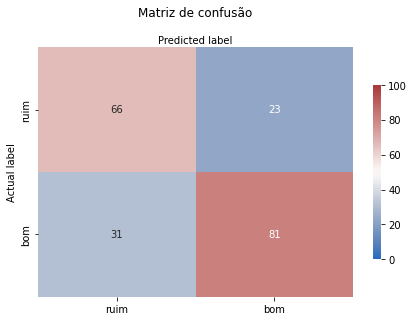

In [62]:
# Plottando a matriz de confusão
fig, ax = plt.subplots()
tick_marks = np.arange(2)
plt.xticks(tick_marks)
plt.yticks(tick_marks)

# Criando o heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap=sns.color_palette("vlag", as_cmap=True),  cbar_kws={"shrink": .7}, vmin=0, vmax=100, center=50, fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matriz de confusão', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.xaxis.set_ticklabels(['ruim', 'bom'])
ax.yaxis.set_ticklabels(['ruim', 'bom'])

plt.show()

In [63]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) # cálculo da acurácia do modelo
print("Precision:",metrics.precision_score(y_test, y_pred)) # cálculo da previsão do modelo
print("Recall:",metrics.recall_score(y_test, y_pred)) # cálculo do recall do modelo

Accuracy: 0.7313432835820896
Precision: 0.7788461538461539
Recall: 0.7232142857142857


A qualidade do vinho foi calculada, utilizando a regressão logística, observando suas características físico-químicas. O vinho é bom se possui nota $\geq 6$ e atribuímos a ele o número 1 na variável 'Q_quality'. Caso contrário o vinho é considerado ruim e atribuímos a ele o número 0 na variável 'Q_quality'. Após aplicar a regressão logística foi possível observar através da matriz de confusão, que para a variável teste, que possui 20% dos dados do dataset, o modelo calculou corretamente 147 classificações e errou em 54 delas.   

- A **acurácia** mede o grau de concordância entre o resultado da medição e o valor verdadeiro e varia de 0 a 1. Calculando esse valor encontramos 0.7313, o que indica que o modelo aplicado se aproxima dos valores reais.

- A **precisão** é uma métrica que traz informações de quantas observações o modelo classificou corretamente como 1, ou seja, de todos os vinhos que o modelo previu como bons, 77,88% eram realmente bons.  

- O **recall** avalia a capacidade do método de detectar com sucesso resultados classificados como positivos. Assim, de todos os vinhos bons, o modelo foi capaz de prever como bons 72,32% deles.